<a href="https://colab.research.google.com/github/Chashm20/statistics-project/blob/main/chashm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# # Load the necessary packages
import pandas as pd #xwendnaway dataka
import numpy as np #gringtrin methody statsticsy tyay, chunka array drust akat


In [37]:
mydata = pd.read_csv('/content/fashion-mnist_train.csv')

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
mydata.tail(5) #handek la datakant nishan adat, bo away bzany chy haya chy w chy nya, atwany tail bkait ba head, yan 5 bgorit

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# load the dataset
record = pd.read_csv('/content/fashion-mnist_train.csv')
print("Number of Rows:", len(mydata)) # azanin ka zhmaray rowakanman chana

Number of Rows: 60000


In [29]:
mydata.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [44]:

mydata.info() # zhmaray rowakanman chana

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [31]:
mydata.describe() #komala zanyaryak darbaray datasetakaman

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [45]:
Q1 = mydata["label"].quantile(0.25)  # 25th percentile
Q3 = mydata["label"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1
print("Interquartile Range (IQR) of area:", IQR) # bo dozinaway Interquartile Range

Interquartile Range (IQR) of area: 5.0


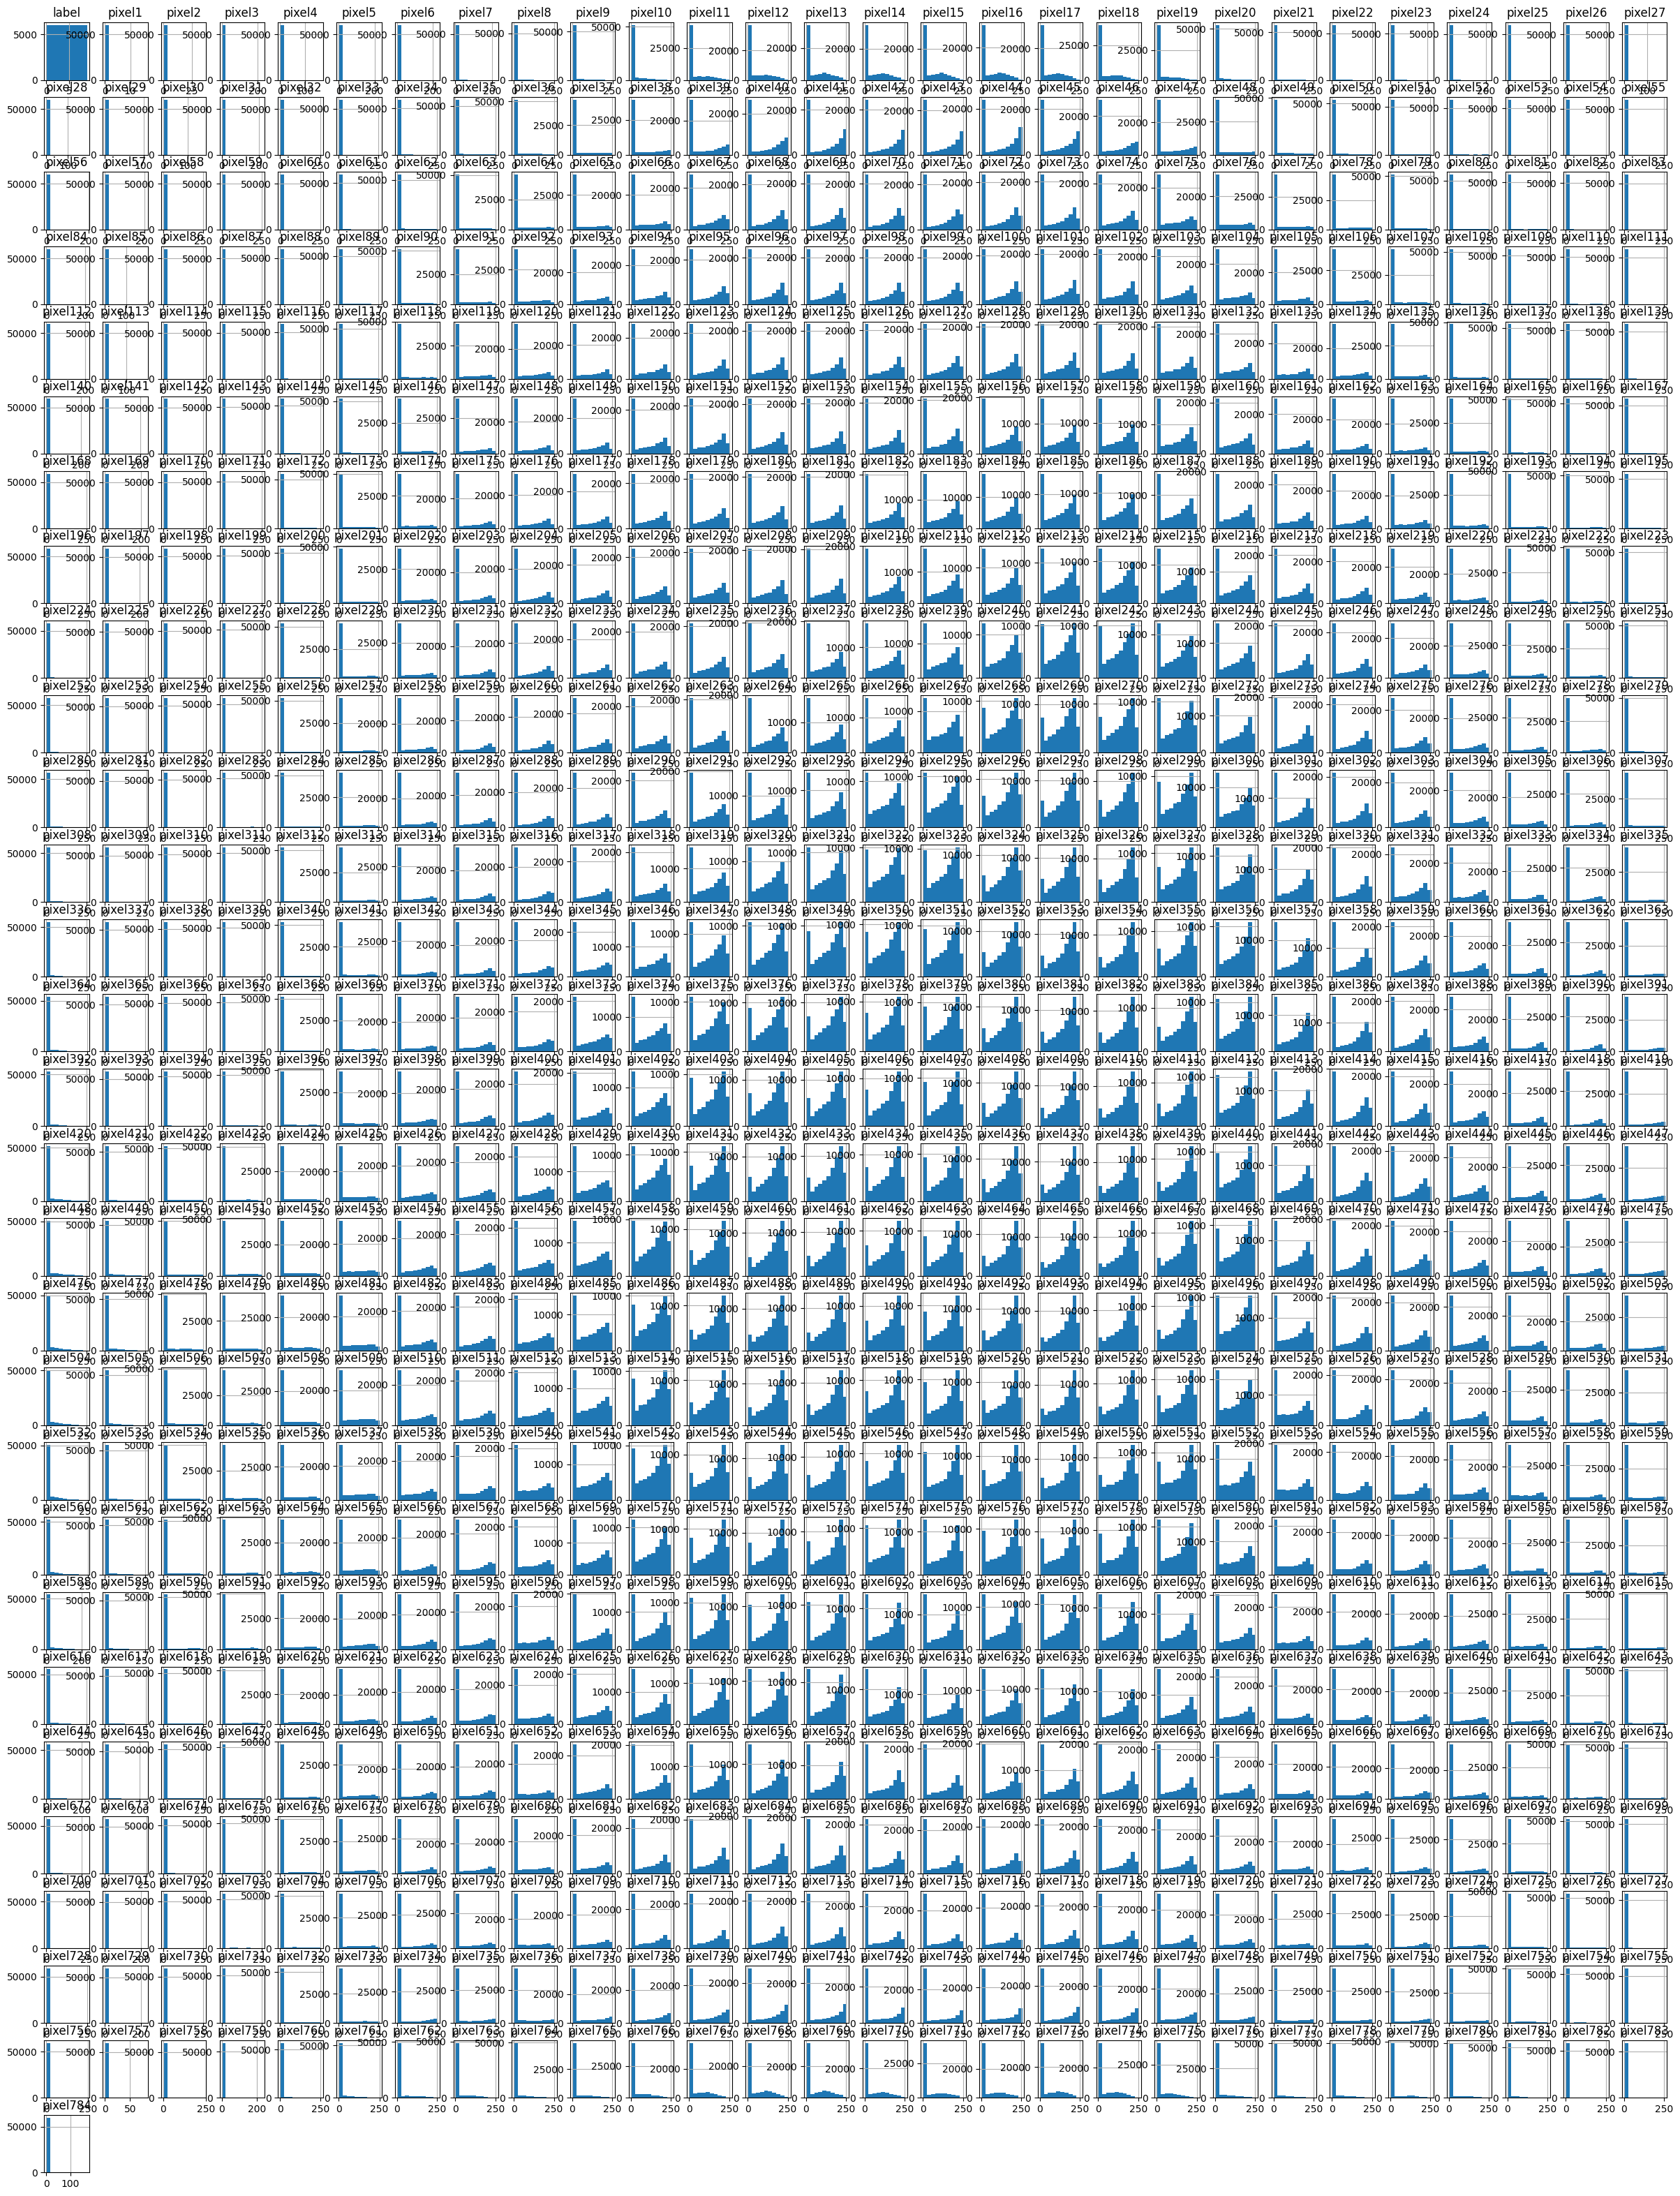

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline # lara histogram pishan adat (30,40) sizeakayaty

mydata.hist(figsize=(30,40))
plt.show()

<Axes: xlabel='label', ylabel='pixel2'>

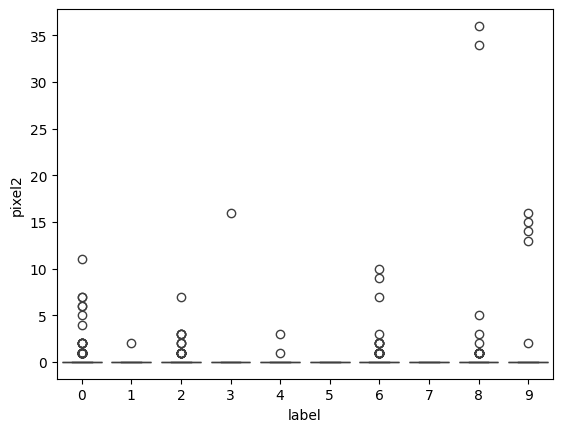

In [51]:
import seaborn as sns #boxplotek drust akat ka yakek la columnakany datasetakay xomany adaine
#columny naw datasety xot bakar ahenit bo away shtakany naw datasetakay xot barawrd bkat ba yaktry

sns.boxplot(x="label", y="pixel2", data=mydata)

In [50]:
pd.crosstab(mydata['label'],mydata['pixel1'] )

pixel1,0,1,2,3,4,7,14,16
label,,,,,,,,
0,5998,1,0,0,0,1,0,0
1,6000,0,0,0,0,0,0,0
2,6000,0,0,0,0,0,0,0
3,5999,0,0,0,0,0,0,1
4,5999,0,0,0,1,0,0,0
5,6000,0,0,0,0,0,0,0
6,5994,4,1,0,0,0,1,0
7,6000,0,0,0,0,0,0,0
8,5996,3,0,1,0,0,0,0


In [52]:
pd.crosstab(mydata['label'],mydata['pixel2'] )

pixel2,0,1,2,3,4,5,6,7,9,10,11,13,14,15,16,34,36
label,,,,,,,,,,,,,,,,,
0,5951,35,7,0,1,1,2,2,0,0,1,0,0,0,0,0,0
1,5999,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5980,12,3,4,0,0,0,1,0,0,0,0,0,0,0,0,0
3,5999,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5998,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5969,22,5,1,0,0,0,1,1,1,0,0,0,0,0,0,0
7,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5981,14,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1


<Axes: xlabel='label', ylabel='count'>

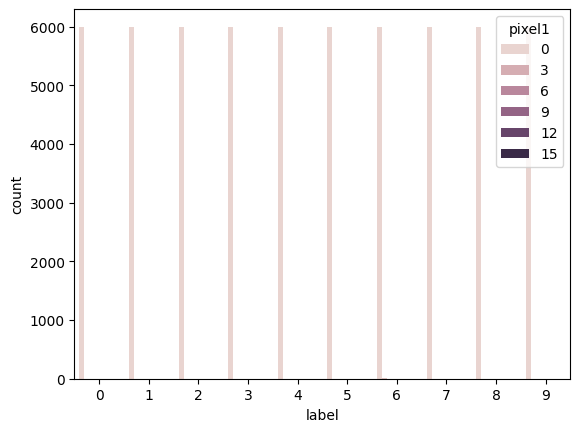

In [54]:
sns.countplot(x="label", hue="pixel1", data=mydata)

In [55]:
pd.pivot_table(mydata, index=['label', 'pixel1'],
                     columns=[ 'pixel2'], aggfunc=len) # ama yat datasetakaman shy akatawa; bo nmuna chan labelek w chan pixeleky henawa

pixel10                                                ...  \
pixel2            0     1    2    3    4    5    6    7    9    10  ...   
label pixel1                                                        ...   
0     0       5950.0  35.0  7.0  NaN  1.0  1.0  2.0  1.0  NaN  NaN  ...   
      1          1.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      7          NaN   NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  ...   
1     0       5999.0   NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2     0       5980.0  12.0  3.0  4.0  NaN  NaN  NaN  1.0  NaN  NaN  ...   
3     0       5999.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      16         NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
4     0       5998.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      4          NaN   NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   
5     0       6000.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
6     0       5965.0  21.0  5.0  1.0  NaN  NaN  NaN  1.0  1.0  NaN  ...   
      1          3.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      2          1.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      14         NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  ...   
7     0       6000.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
8     0       5978.0  13.0  1.0  1.0  NaN  1.0  NaN  NaN  NaN  NaN  ...   
      1          2.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      3          1.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
9     0       5995.0   NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

             pixel99                                               
pixel2            7    9    10   11   13   14   15   16   34   36  
label pixel1                                                       
0     0          1.0  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  
      1          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      7          1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2     0          1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      16         NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  
4     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      4          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6     0          1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      1          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      2          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      14         NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  
      1          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      3          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9     0          NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  NaN  NaN  

[19 rows x 13294 columns]

In [57]:
pd.pivot_table(mydata,'pixel1',index=['label', 'pixel2'],
                     columns=[ 'pixel3'])

pixel3             0       1         2    3    4    5    6    7    8    9    \
label pixel2                                                                  
0     0       0.000180  0.0000  0.000000  0.0  0.0  0.0  0.0  0.0  NaN  0.0   
      1       0.000000  0.0000  0.000000  0.0  0.0  NaN  NaN  NaN  NaN  NaN   
      2       0.000000     NaN  0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      4            NaN     NaN       NaN  NaN  0.0  NaN  NaN  NaN  NaN  NaN   
      5            NaN     NaN       NaN  NaN  NaN  0.0  NaN  NaN  NaN  NaN   
      6            NaN     NaN       NaN  NaN  NaN  0.0  0.0  NaN  NaN  NaN   
      7            NaN     NaN       NaN  NaN  NaN  NaN  NaN  3.5  NaN  NaN   
      11           NaN     NaN       NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN   
1     0       0.000000  0.0000       NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
      2       0.000000     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2     0       0.000000  0.0000  0.000000  0.0  0.0  NaN  NaN  NaN  NaN  NaN   
      1       0.000000  0.0000       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      2       0.000000     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      3       0.000000     NaN       NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
      7            NaN  0.0000       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3     0       0.000000     NaN       NaN  NaN  NaN  0.0  NaN  NaN  NaN  NaN   
      16           NaN     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4     0       0.000000  0.0000  0.000000  0.0  0.0  0.0  NaN  0.0  NaN  NaN   
      1            NaN  0.0000       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      3            NaN     NaN       NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN   
5     0       0.000000     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
6     0       0.000686  0.0000  0.032258  0.0  0.0  0.0  0.0  NaN  NaN  NaN   
      1       0.000000  0.1250  0.000000  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
      2       0.000000     NaN  0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      3       0.000000     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      7       0.000000     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      9            NaN     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   
      10           NaN     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
7     0       0.000000     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8     0       0.000336  0.1875  0.000000  0.0  0.0  0.0  NaN  NaN  0.0  NaN   
      1       0.083333  0.0000       NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
      2       0.000000     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      3            NaN     NaN       NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
      5       0.000000     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      34           NaN     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      36           NaN     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9     0       0.000000     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      2            NaN     NaN  0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      13           NaN     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      14           NaN     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      15           NaN     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
      16           NaN     NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

pixel3        ...  30   32   34   35   52   54   56   78   106  226  
label pixel2  ...                                                    
0     0       ...  0.0  0.0  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  
      1       ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      2       ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      4       ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      5       ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      6       ...  NaN  NaN  NaN 

In [58]:
pd.pivot_table(mydata, index=['label', 'pixel1'],
                     columns=[ 'pixel2'], aggfunc=len)

pixel10                                                ...  \
pixel2            0     1    2    3    4    5    6    7    9    10  ...   
label pixel1                                                        ...   
0     0       5950.0  35.0  7.0  NaN  1.0  1.0  2.0  1.0  NaN  NaN  ...   
      1          1.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      7          NaN   NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  ...   
1     0       5999.0   NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2     0       5980.0  12.0  3.0  4.0  NaN  NaN  NaN  1.0  NaN  NaN  ...   
3     0       5999.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      16         NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
4     0       5998.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      4          NaN   NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   
5     0       6000.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
6     0       5965.0  21.0  5.0  1.0  NaN  NaN  NaN  1.0  1.0  NaN  ...   
      1          3.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      2          1.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      14         NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  ...   
7     0       6000.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
8     0       5978.0  13.0  1.0  1.0  NaN  1.0  NaN  NaN  NaN  NaN  ...   
      1          2.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
      3          1.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
9     0       5995.0   NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

             pixel99                                               
pixel2            7    9    10   11   13   14   15   16   34   36  
label pixel1                                                       
0     0          1.0  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  
      1          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      7          1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2     0          1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      16         NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  
4     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      4          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6     0          1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      1          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      2          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      14         NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8     0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  
      1          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
      3          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9     0          NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  NaN  NaN  

[19 rows x 13294 columns]

In [59]:
mydata['label'].std() #bo dozinaway standard divitiona

2.8723052592459086

In [60]:
mydata['label'].mean() #bo dozinaway meany columny label

np.float64(4.5)

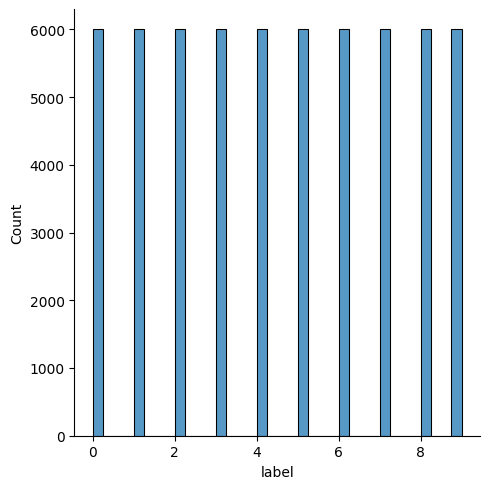

In [61]:
sns.displot(mydata['label']) #histogramek bo show akat ka lasar columny label krdumana

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: >, <Axes: >]], dtype=object)

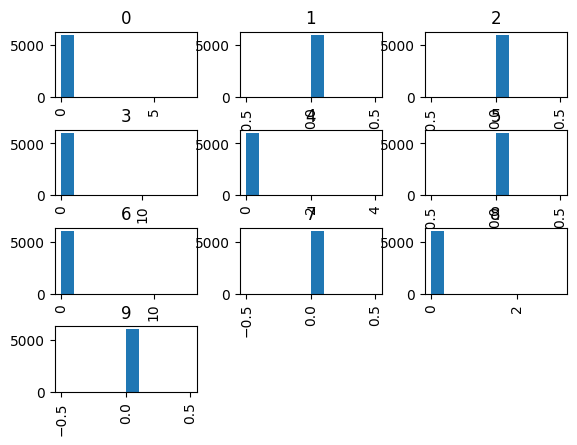

In [62]:
mydata.hist(by='label',column = 'pixel1')

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: >, <Axes: >]], dtype=object)

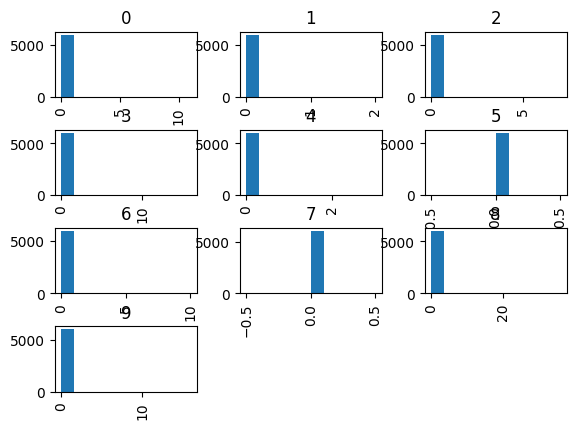

In [63]:
mydata.hist(by='label',column = 'pixel2')

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: >, <Axes: >]], dtype=object)

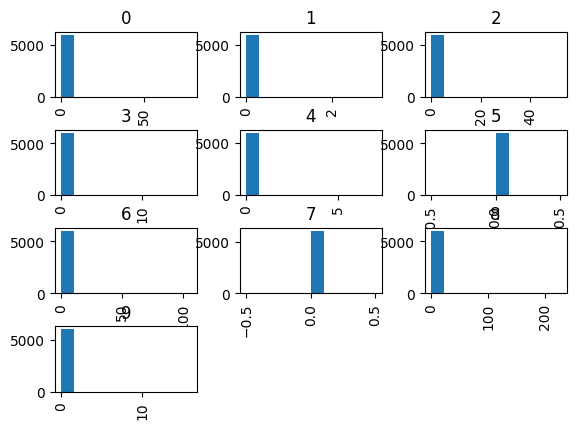

In [64]:
mydata.hist(by='label',column = 'pixel3')

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '14'}>, <Axes: title={'center': '16'}>,
        <Axes: >]], dtype=object)

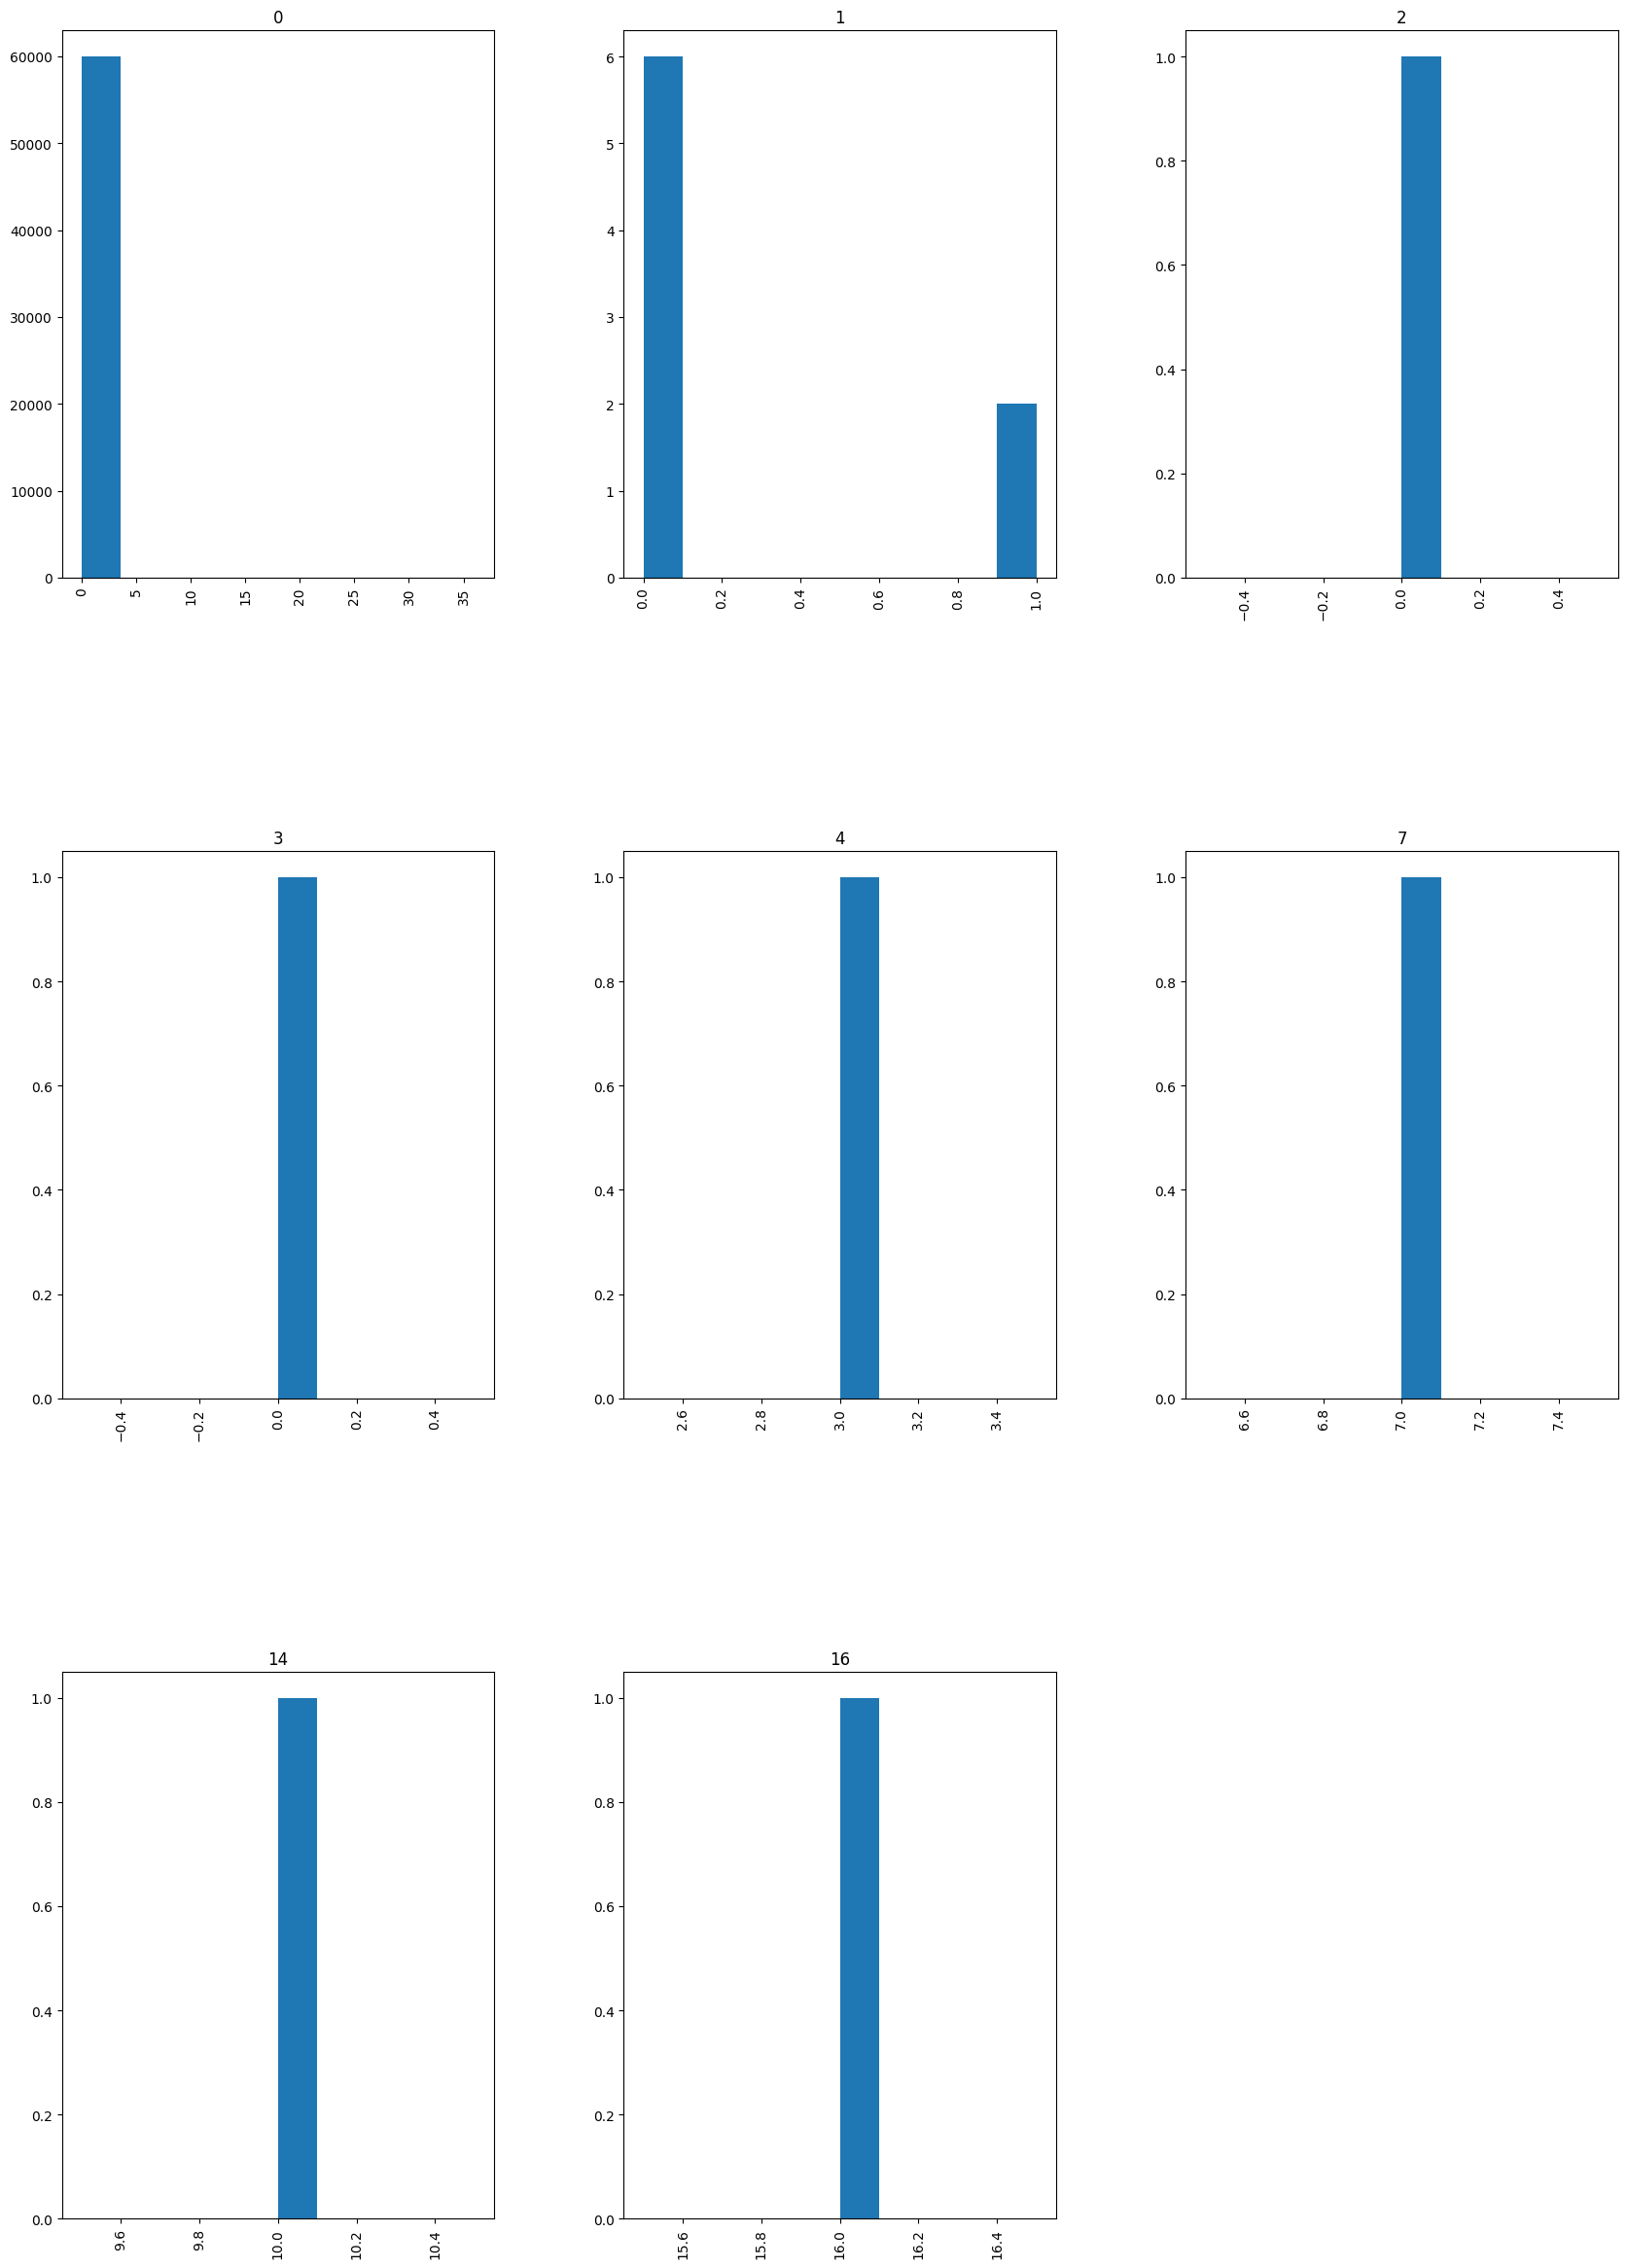

In [65]:
mydata.hist(by='pixel1',column = 'pixel2', figsize=(20,30))

In [4]:
sns.pairplot(mydata) #har yakek la columnakan barawrd akat ba columneky tr

NameError: name 'sns' is not defined

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


### Measures of Central Tendency



Measures of central tendency provide a summary statistic on the center of a given distribution, the "average" value of the distribution.


In [ ]:
np.random.seed(42) # bo away chan zhmarayak warbgrin ba shewayaky randomly

In [ ]:
x = st.skewnorm.rvs(10, size=1000) # bo wenakrdny standard divitionakamana

In [ ]:
x[0:20]

In [ ]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'pink')

#### Mean


The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):


In [ ]:
xbar = x.mean()
xbar

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

#### Median


The second most common measure of central tendency is the **median**, the midpoint value in the distribution:


In [ ]:
np.median(x)

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:


In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Measures of Dispersion


#### Variance


$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$


In [ ]:
x.var()

#### Standard Deviation


A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:


In [ ]:
x.var()**(1/2)

In [ ]:
sigma = x.std()
sigma

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error


A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:


In [ ]:
sigma/(x.size)**(1/2)

In [ ]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

In [ ]:
st.sem(x, ddof=0)
st.sem(x, ddof=0)

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.


### Gaussian Distribution


After Carl Friedrich Gauss. Also known as **normal distribution**:


In [ ]:
x = np.random.normal(size=10000)

In [ ]:
sns.set_style('ticks')

In [ ]:
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...


In [ ]:
x.mean()

In [ ]:
x.std()
x.std()


...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).


Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:
1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

### The Central Limit Theorem


To develop a functional understanding of the CLT, let's sample some values from our normal distribution:


In [ ]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

The mean of a sample isn't always going to be close to zero with such a small sample:


In [ ]:
x_sample.mean()

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:


In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed:



In [ ]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

In [ ]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

In [ ]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

In [ ]:
s = st.skewnorm.rvs(10, size=10000)

In [ ]:
_ = sns.displot(s, kde=True)

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

In [ ]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

In [ ]:
_ = sns.displot(m, kde=True)

In [ ]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

In [ ]:
u = np.random.uniform(size=10000)

In [ ]:
_ = sns.displot(u)

In [ ]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

In [ ]:
x_i = 85
mu = 60
sigma = 10

In [ ]:
x = np.random.normal(mu, sigma, 10000)

In [ ]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [ ]:
z = (x_i - mu)/sigma
z

In [ ]:
z = (x_i - np.mean(x))/np.std(x)
z

In [ ]:
len(np.where(x > 85)[0])

In [ ]:
100*69/10000

In [ ]:
np.percentile(x, 99)

In [ ]:
mu = 90
sigma = 2

In [ ]:
y = np.random.normal(mu, sigma, 10000)

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [ ]:
z = (x_i - mu)/sigma
z

In [ ]:
z = (x_i - np.mean(y))/np.std(y)
z

In [ ]:
len(np.where(y > 85)[0])

In [ ]:
100*9933/10000

In [ ]:
10000-9933

In [ ]:
np.percentile(y, 1)


In [ ]:
p_below = st.norm.cdf(-2.5)
p_below

In [ ]:
p_below*10000

In [ ]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [ ]:
st.norm.cdf(2.5)

In [ ]:
p_above = 1-st.norm.cdf(2.5)
p_above

In [ ]:
p_above*10000

In [ ]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [ ]:
p_outside = p_below + p_above
p_outside

In [ ]:
p_outside*10000

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [ ]:
st.norm.ppf(.025)

In [ ]:
st.norm.ppf(.975)

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

In [ ]:
st.norm.ppf(.005)

In [ ]:
st.norm.ppf(.995)

In [ ]:
sns.displot(y, color='gray')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')